In [30]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

from PIL import Image
import numpy as np
import os

In [2]:
# Tensor Flow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout


2023-11-21 15:28:45.583553: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Verify TensorFlow & Keras
print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)

TensorFlow version:  2.12.0
Keras version:  2.12.0


In [4]:
train_df = pd.read_csv('leaf-train.csv')
test_df = pd.read_csv('leaf-test.csv')

There appears to be an equal amount of each species, indicating a balanced dataset.

# EDA

In [5]:
train_df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [7]:
train_df.shape

(990, 194)

In [8]:
test_df.shape

(594, 193)

In [9]:
#Check for null although shouldnt be any...
columns_with_null = train_df.columns[train_df.isnull().any()]
null_values = train_df[columns_with_null].isnull().sum()

print("Columns with null values:")
print(null_values)

Columns with null values:
Series([], dtype: float64)


In [10]:
print("\nTraining Dataset Description:")
print(train_df.describe())
print("\nTest Dataset Description:")
print(test_df.describe())


Training Dataset Description:
                id     margin1     margin2     margin3     margin4  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
mean    799.595960    0.017412    0.028539    0.031988    0.023280   
std     452.477568    0.019739    0.038855    0.025847    0.028411   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     415.250000    0.001953    0.001953    0.013672    0.005859   
50%     802.500000    0.009766    0.011719    0.025391    0.013672   
75%    1195.500000    0.025391    0.041016    0.044922    0.029297   
max    1584.000000    0.087891    0.205080    0.156250    0.169920   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  ...   
mean     0.014264    0.038579    0.019202    0.001083    0.007167  ...   
std      0.018390    0.052030    0.017511    0.002743    0.008933  ...   
min      0.000000    0.000000    0.000000 

/Users/kevhhu/opt/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kevhhu/opt/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kevhhu/opt/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


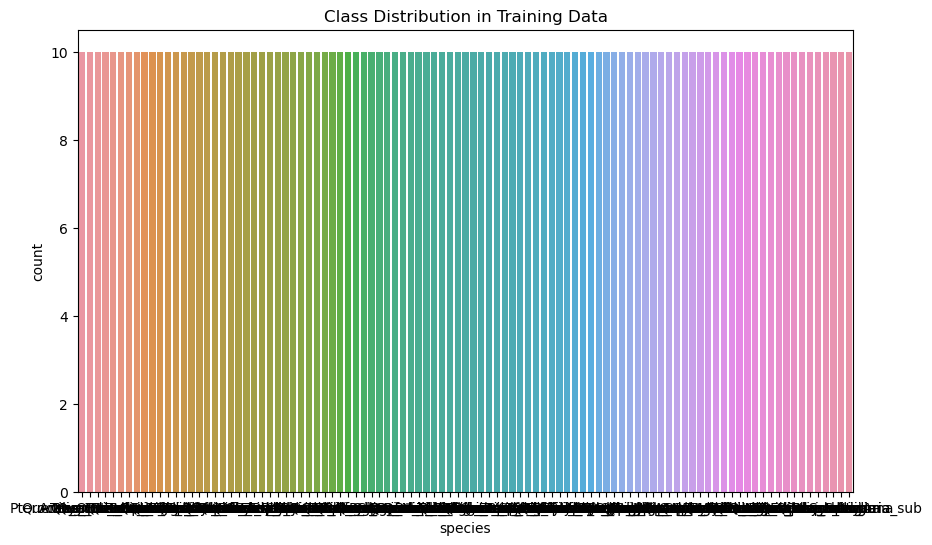

In [11]:
if 'species' in train_df.columns:  
    plt.figure(figsize=(10, 6))
    sns.countplot(x='species', data=train_df)
    plt.title('Class Distribution in Training Data')
    plt.show()

In [12]:
target_column = 'species'
feature_columns = [col for col in train_df.columns if col != target_column]

print("Feature Columns:", feature_columns)

Feature Columns: ['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6', 'margin7', 'margin8', 'margin9', 'margin10', 'margin11', 'margin12', 'margin13', 'margin14', 'margin15', 'margin16', 'margin17', 'margin18', 'margin19', 'margin20', 'margin21', 'margin22', 'margin23', 'margin24', 'margin25', 'margin26', 'margin27', 'margin28', 'margin29', 'margin30', 'margin31', 'margin32', 'margin33', 'margin34', 'margin35', 'margin36', 'margin37', 'margin38', 'margin39', 'margin40', 'margin41', 'margin42', 'margin43', 'margin44', 'margin45', 'margin46', 'margin47', 'margin48', 'margin49', 'margin50', 'margin51', 'margin52', 'margin53', 'margin54', 'margin55', 'margin56', 'margin57', 'margin58', 'margin59', 'margin60', 'margin61', 'margin62', 'margin63', 'margin64', 'shape1', 'shape2', 'shape3', 'shape4', 'shape5', 'shape6', 'shape7', 'shape8', 'shape9', 'shape10', 'shape11', 'shape12', 'shape13', 'shape14', 'shape15', 'shape16', 'shape17', 'shape18', 'shape19', 'shape20', 'shape

In [13]:
train_df.dtypes

id             int64
species       object
margin1      float64
margin2      float64
margin3      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 194, dtype: object

# Data Processing

In [19]:
def load_and_preprocess_images(folder_path, image_size=(64, 64)):
    images = []
    ids = []
    for filename in sorted(os.listdir(folder_path), key=lambda x: int(x.split('.')[0])):
        if filename.endswith('.jpg'):  
            img_id = int(filename.split('.')[0])  
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert('RGB') 
            img = img.resize(image_size)
            images.append(np.array(img))
            ids.append(img_id)
    return np.array(images), np.array(ids)

folder_path = '/Users/kevhhu/Downloads/images'
images, image_ids = load_and_preprocess_images(folder_path)
images = images / 255.0  # Normalize images

aligned_images = []
aligned_labels = []
for img_id, img in zip(image_ids, images):
    if img_id in train_df['id'].values:
        aligned_images.append(img)
        label = train_df[train_df['id'] == img_id]['species'].iloc[0]
        aligned_labels.append(label)
aligned_images = np.array(aligned_images)
aligned_labels = np.array(aligned_labels)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(aligned_labels)

# Verification of label encoding
print("Unique Species in Dataset:", len(np.unique(y_encoded)))
sample_encoded_labels = y_encoded[:5]
print("Sample Encoded Labels:", sample_encoded_labels)
print("Inverse Transformed Sample Labels:", label_encoder.inverse_transform(sample_encoded_labels))

n_splits = 3 
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(aligned_images, y_encoded)):
    X_train_fold, X_val_fold = aligned_images[train_index], aligned_images[val_index]
    y_train_fold, y_val_fold = y_encoded[train_index], y_encoded[val_index]
    y_train_fold_categorical = to_categorical(y_train_fold)
    y_val_fold_categorical = to_categorical(y_val_fold)
# Verification
train_index, val_index = next(iter(stratified_kfold.split(aligned_images, y_encoded)))
assert not set(train_index).intersection(set(val_index)), "Overlap found in indices"

Unique Species in Dataset: 99
Sample Encoded Labels: [ 3 49 65 94 84]
Inverse Transformed Sample Labels: ['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis']


#### "Perfectly balanced, as all things should be" - Thanos
#### No problems as of this point now

# CNN Models

In [23]:
# Base CNN Architecture
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def create_cnn_model(input_shape, num_classes, filters, dense_units, dropout_rate=0.5):
    input_layer = Input(shape=input_shape)

    x = input_layer
    for f in filters:
        x = Conv2D(f, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2))(x)
    
    x = Flatten()(x)
    x = Dense(dense_units, activation='relu')(x)
    if dropout_rate > 0:
        x = Dropout(dropout_rate)(x)
    
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


## Model 1

In [26]:
results = []

hyperparams = [
    {'filters': [32, 64], 'dense_units': 128},
    {'filters': [32, 64, 128], 'dense_units': 256},
    {'filters': [16, 32, 64], 'dense_units': 128}
]

n_splits = 3 
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)

for params in hyperparams:
    fold_results = []
    for fold, (train_index, val_index) in enumerate(stratified_kfold.split(aligned_images, y_encoded)):
        X_train_fold, X_val_fold = aligned_images[train_index], aligned_images[val_index]
        y_train_fold, y_val_fold = y_encoded[train_index], y_encoded[val_index]
        y_train_fold_categorical = to_categorical(y_train_fold, num_classes=99)
        y_val_fold_categorical = to_categorical(y_val_fold, num_classes=99)

        model = create_cnn_model(input_shape=(64, 64, 3), num_classes=99, **params)
        history = model.fit(X_train_fold, y_train_fold_categorical, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold_categorical))

        best_val_accuracy = max(history.history['val_accuracy'])
        best_val_loss = min(history.history['val_loss'])
        fold_results.append({'fold': fold, 'accuracy': best_val_accuracy, 'loss': best_val_loss})

    results.append({'params': params, 'results': fold_results})

Epoch 1/10
21/21 [==============================] - 2s 65ms/step - loss: 4.6030 - accuracy: 0.0136 - val_loss: 4.5142 - val_accuracy: 0.0848
Epoch 2/10
21/21 [==============================] - 1s 59ms/step - loss: 4.3474 - accuracy: 0.0606 - val_loss: 3.9820 - val_accuracy: 0.1394
Epoch 3/10
21/21 [==============================] - 1s 60ms/step - loss: 3.7213 - accuracy: 0.1591 - val_loss: 3.2441 - val_accuracy: 0.2485
Epoch 4/10
21/21 [==============================] - 1s 64ms/step - loss: 3.1069 - accuracy: 0.2742 - val_loss: 2.7053 - val_accuracy: 0.3818
Epoch 5/10
21/21 [==============================] - 1s 60ms/step - loss: 2.6253 - accuracy: 0.3364 - val_loss: 2.3093 - val_accuracy: 0.4364
Epoch 6/10
21/21 [==============================] - 1s 61ms/step - loss: 2.2067 - accuracy: 0.4333 - val_loss: 2.0108 - val_accuracy: 0.5273
Epoch 7/10
21/21 [==============================] - 1s 60ms/step - loss: 1.7464 - accuracy: 0.5348 - val_loss: 1.9721 - val_accuracy: 0.5364
Epoch 8/10
21

21/21 [==============================] - 2s 90ms/step - loss: 1.7139 - accuracy: 0.5273 - val_loss: 1.8774 - val_accuracy: 0.5333
Epoch 10/10
21/21 [==============================] - 2s 90ms/step - loss: 1.5340 - accuracy: 0.5682 - val_loss: 1.7947 - val_accuracy: 0.5636
Epoch 1/10
21/21 [==============================] - 2s 39ms/step - loss: 4.6151 - accuracy: 0.0076 - val_loss: 4.5882 - val_accuracy: 0.0152
Epoch 2/10
21/21 [==============================] - 1s 34ms/step - loss: 4.5807 - accuracy: 0.0242 - val_loss: 4.5532 - val_accuracy: 0.0364
Epoch 3/10
21/21 [==============================] - 1s 34ms/step - loss: 4.4965 - accuracy: 0.0379 - val_loss: 4.3187 - val_accuracy: 0.0848
Epoch 4/10
21/21 [==============================] - 1s 38ms/step - loss: 4.2005 - accuracy: 0.0667 - val_loss: 3.9731 - val_accuracy: 0.1606
Epoch 5/10
21/21 [==============================] - 1s 35ms/step - loss: 3.8334 - accuracy: 0.1409 - val_loss: 3.5550 - val_accuracy: 0.2515
Epoch 6/10
21/21 [=====

In [27]:
for model_result in results:
    params = model_result['params']
    best_accuracy = max(result['accuracy'] for result in model_result['results'])
    best_loss = min(result['loss'] for result in model_result['results'])

    print(f"Hyperparameters: {params}")
    print(f"Best Validation Accuracy: {best_accuracy}")
    print(f"Best Validation Loss: {best_loss}\n")

Hyperparameters: {'filters': [32, 64], 'dense_units': 128}
Best Validation Accuracy: 0.5545454621315002
Best Validation Loss: 1.7124648094177246

Hyperparameters: {'filters': [32, 64, 128], 'dense_units': 256}
Best Validation Accuracy: 0.6090909242630005
Best Validation Loss: 1.5136737823486328

Hyperparameters: {'filters': [16, 32, 64], 'dense_units': 128}
Best Validation Accuracy: 0.5181818008422852
Best Validation Loss: 2.0736000537872314



In [28]:
best_model = create_cnn_model(input_shape=(64, 64, 3), num_classes=99, filters=[32, 64, 128], dense_units=256)

predictions = best_model.predict(X_val_fold)

11/11 [==============================] - 0s 26ms/step


In [31]:
y_val_binarized = label_binarize(y_val_fold, classes=range(99))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(99):
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

precision = dict()
recall = dict()
pr_auc = dict()
for i in range(99):
    precision[i], recall[i], _ = precision_recall_curve(y_val_binarized[:, i], predictions[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

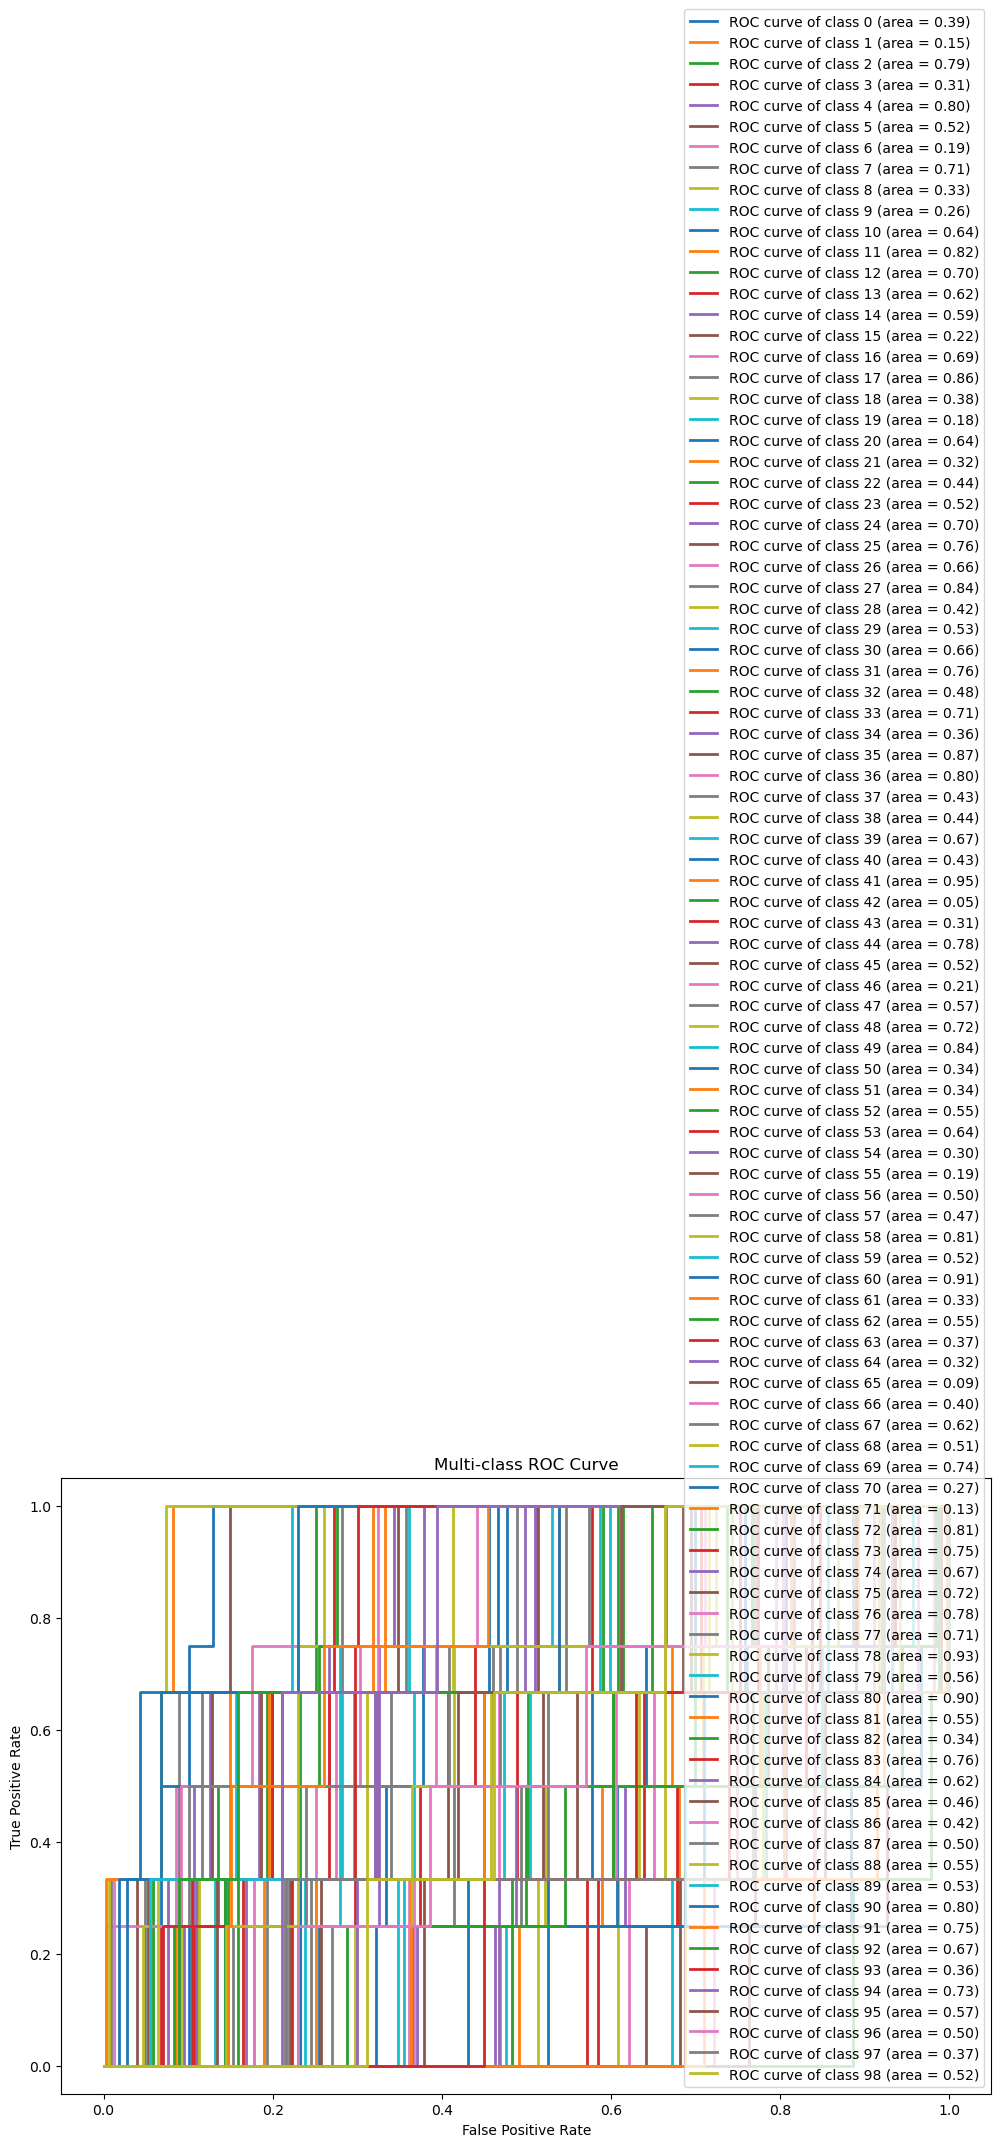

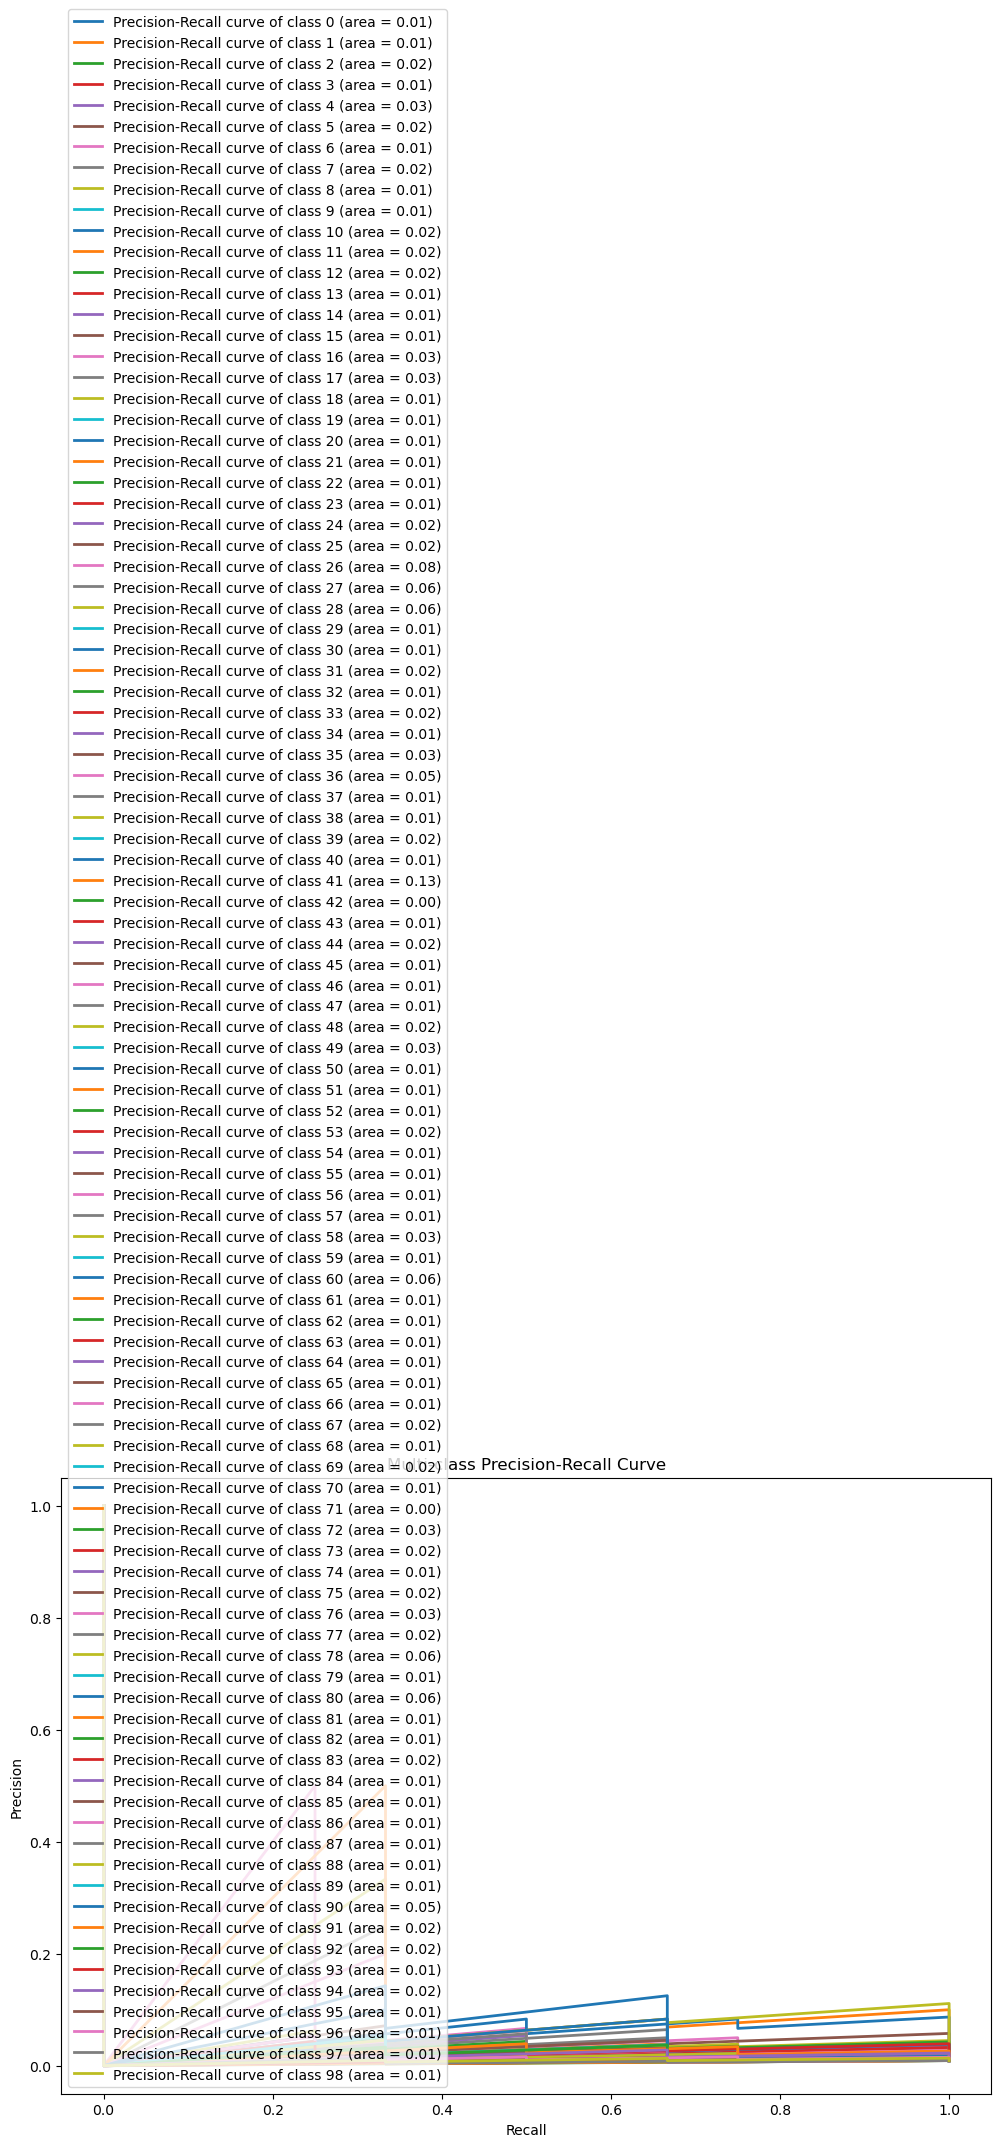

In [32]:
plt.figure(figsize=(12, 8))
for i in range(99):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(12, 8))
for i in range(99):
    plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve of class {0} (area = {1:0.2f})'.format(i, pr_auc[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [39]:
def load_and_preprocess_images(folder_path, ids_df, image_size=(64, 64)):
    images = []
    ids = []
    for filename in sorted(os.listdir(folder_path), key=lambda x: int(x.split('.')[0])):
        if filename.endswith('.jpg'):
            img_id = int(filename.split('.')[0])
            if img_id in ids_df['id'].values:
                img_path = os.path.join(folder_path, filename)
                img = Image.open(img_path).convert('RGB')
                img = img.resize(image_size)
                images.append(np.array(img))
                ids.append(img_id)
    return np.array(images), np.array(ids)

test_images, test_ids = load_and_preprocess_images(folder_path, test_df)
test_images = test_images / 255.0  

if len(test_images) != 594:
    raise ValueError(f"Expected 594 test images, but found {len(test_images)}")


test_predictions = final_model.predict(test_images)

submission_df = pd.DataFrame(test_predictions, columns=label_encoder.classes_)

if len(submission_df) != 594:
    raise ValueError(f"Submission DataFrame should have 594 rows, but has {len(submission_df)}")

submission_df.insert(0, 'id', test_ids)
submission_df.to_csv('leaf_classification_submission.csv', index=False)


19/19 [==============================] - 1s 25ms/step


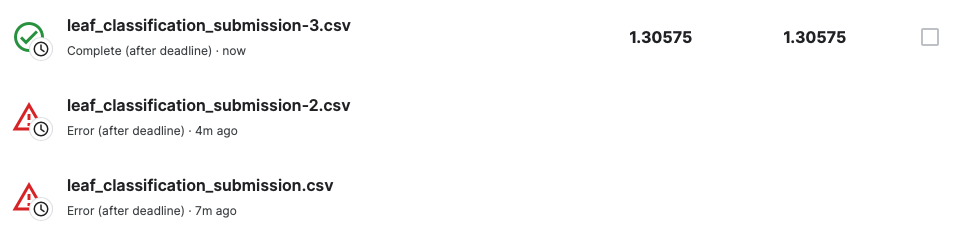

## Model 2
There were some benefits to increased number of filters and dense units on the validaiton accuracy from hyperparameter tuning the previous model

In [41]:
new_hyperparams = [
    {'filters': [64, 128], 'dense_units': 256, 'dropout_rate': 0.4},
    {'filters': [32, 64, 128, 256], 'dense_units': 512, 'dropout_rate': 0.5},
    {'filters': [64, 64, 128], 'dense_units': 256, 'dropout_rate': 0.3},
    {'filters': [32, 64], 'dense_units': 256, 'dropout_rate': 0.6}
]

results = []

n_splits = 3 
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)

for params in new_hyperparams:
    fold_results = []
    for fold, (train_index, val_index) in enumerate(stratified_kfold.split(aligned_images, y_encoded)):
        X_train_fold, X_val_fold = aligned_images[train_index], aligned_images[val_index]
        y_train_fold, y_val_fold = y_encoded[train_index], y_encoded[val_index]
        y_train_fold_categorical = to_categorical(y_train_fold, num_classes=99)
        y_val_fold_categorical = to_categorical(y_val_fold, num_classes=99)

        model = create_cnn_model(input_shape=(64, 64, 3), num_classes=99, **params)
        history = model.fit(X_train_fold, y_train_fold_categorical, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold_categorical))

        best_val_accuracy = max(history.history['val_accuracy'])
        best_val_loss = min(history.history['val_loss'])
        fold_results.append({'fold': fold, 'accuracy': best_val_accuracy, 'loss': best_val_loss})

    results.append({'params': params, 'results': fold_results})

for model_result in results:
    params = model_result['params']
    best_accuracy = max(result['accuracy'] for result in model_result['results'])
    best_loss = min(result['loss'] for result in model_result['results'])

    print(f"Hyperparameters: {params}")
    print(f"Best Validation Accuracy: {best_accuracy}")
    print(f"Best Validation Loss: {best_loss}\n")


Epoch 1/10
21/21 [==============================] - 4s 185ms/step - loss: 4.6316 - accuracy: 0.0364 - val_loss: 4.4104 - val_accuracy: 0.1545
Epoch 2/10
21/21 [==============================] - 4s 174ms/step - loss: 3.9280 - accuracy: 0.1455 - val_loss: 3.2076 - val_accuracy: 0.2939
Epoch 3/10
21/21 [==============================] - 4s 179ms/step - loss: 2.6993 - accuracy: 0.3606 - val_loss: 2.3007 - val_accuracy: 0.4485
Epoch 4/10
21/21 [==============================] - 4s 174ms/step - loss: 1.7886 - accuracy: 0.5258 - val_loss: 1.9333 - val_accuracy: 0.5152
Epoch 5/10
21/21 [==============================] - 4s 174ms/step - loss: 1.3572 - accuracy: 0.6061 - val_loss: 1.8100 - val_accuracy: 0.5121
Epoch 6/10
21/21 [==============================] - 4s 173ms/step - loss: 0.9858 - accuracy: 0.7167 - val_loss: 1.8330 - val_accuracy: 0.5515
Epoch 7/10
21/21 [==============================] - 4s 182ms/step - loss: 0.7922 - accuracy: 0.7742 - val_loss: 1.6861 - val_accuracy: 0.5636
Epoch 

Epoch 9/10
21/21 [==============================] - 3s 127ms/step - loss: 1.8106 - accuracy: 0.5030 - val_loss: 1.7341 - val_accuracy: 0.5121
Epoch 10/10
21/21 [==============================] - 3s 127ms/step - loss: 1.5742 - accuracy: 0.5561 - val_loss: 1.6164 - val_accuracy: 0.5788
Epoch 1/10
21/21 [==============================] - 3s 142ms/step - loss: 4.6198 - accuracy: 0.0076 - val_loss: 4.5814 - val_accuracy: 0.0424
Epoch 2/10
21/21 [==============================] - 3s 141ms/step - loss: 4.5253 - accuracy: 0.0288 - val_loss: 4.2540 - val_accuracy: 0.1152
Epoch 3/10
21/21 [==============================] - 3s 137ms/step - loss: 3.9297 - accuracy: 0.1333 - val_loss: 3.1619 - val_accuracy: 0.2364
Epoch 4/10
21/21 [==============================] - 3s 138ms/step - loss: 3.0107 - accuracy: 0.2576 - val_loss: 2.6435 - val_accuracy: 0.4091
Epoch 5/10
21/21 [==============================] - 3s 138ms/step - loss: 2.4011 - accuracy: 0.3727 - val_loss: 2.1467 - val_accuracy: 0.4879
Epoch

Epoch 7/10
21/21 [==============================] - 2s 77ms/step - loss: 1.6838 - accuracy: 0.5318 - val_loss: 1.9718 - val_accuracy: 0.5121
Epoch 8/10
21/21 [==============================] - 2s 73ms/step - loss: 1.3905 - accuracy: 0.6121 - val_loss: 1.8471 - val_accuracy: 0.5485
Epoch 9/10
21/21 [==============================] - 2s 74ms/step - loss: 1.2353 - accuracy: 0.6455 - val_loss: 1.7872 - val_accuracy: 0.5758
Epoch 10/10
21/21 [==============================] - 2s 77ms/step - loss: 1.0344 - accuracy: 0.7030 - val_loss: 1.7086 - val_accuracy: 0.5636
Hyperparameters: {'filters': [64, 128], 'dense_units': 256, 'dropout_rate': 0.4}
Best Validation Accuracy: 0.596969723701477
Best Validation Loss: 1.6852620840072632

Hyperparameters: {'filters': [32, 64, 128, 256], 'dense_units': 512, 'dropout_rate': 0.5}
Best Validation Accuracy: 0.6121212244033813
Best Validation Loss: 1.4637675285339355

Hyperparameters: {'filters': [64, 64, 128], 'dense_units': 256, 'dropout_rate': 0.3}
Best V

### ROC and Precision Curve Using Aggregate class

Epoch 1/10
31/31 [==============================] - 4s 119ms/step - loss: 4.6127 - accuracy: 0.0101 - val_loss: 4.5941 - val_accuracy: 0.0182
Epoch 2/10
31/31 [==============================] - 4s 114ms/step - loss: 4.5923 - accuracy: 0.0152 - val_loss: 4.5702 - val_accuracy: 0.0091
Epoch 3/10
31/31 [==============================] - 4s 117ms/step - loss: 4.4129 - accuracy: 0.0364 - val_loss: 3.8141 - val_accuracy: 0.1455
Epoch 4/10
31/31 [==============================] - 4s 116ms/step - loss: 3.6731 - accuracy: 0.1313 - val_loss: 2.8656 - val_accuracy: 0.3515
Epoch 5/10
31/31 [==============================] - 4s 120ms/step - loss: 2.8718 - accuracy: 0.2747 - val_loss: 2.0911 - val_accuracy: 0.5030
Epoch 6/10
31/31 [==============================] - 3s 111ms/step - loss: 2.2823 - accuracy: 0.3960 - val_loss: 1.6241 - val_accuracy: 0.6333
Epoch 7/10
31/31 [==============================] - 3s 111ms/step - loss: 1.8059 - accuracy: 0.4788 - val_loss: 1.1541 - val_accuracy: 0.7121
Epoch 

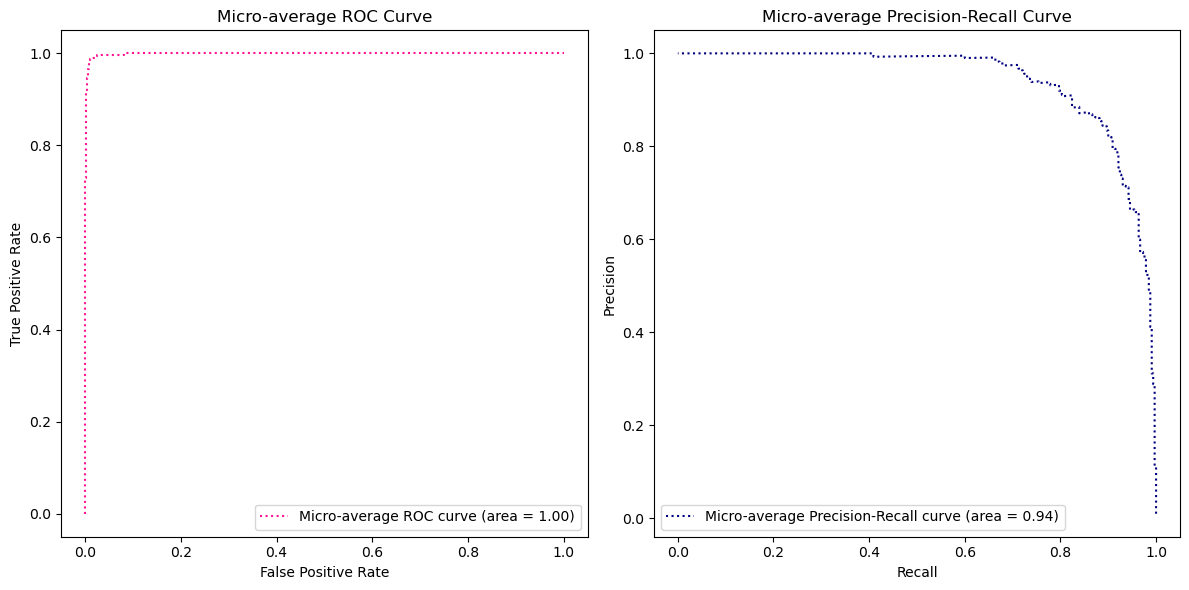

In [43]:
best_model = create_cnn_model(input_shape=(64, 64, 3), num_classes=99, filters=[32, 64, 128, 256], dense_units=512, dropout_rate=0.5)
history = best_model.fit(aligned_images, to_categorical(y_encoded, num_classes=99), epochs=10, batch_size=32, validation_data=(X_val_fold, to_categorical(y_val_fold, num_classes=99)))

predictions = best_model.predict(X_val_fold)

y_val_binarized = label_binarize(y_val_fold, classes=range(99))

fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(99):
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_val_binarized[:, i], predictions[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_val_binarized.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

precision["micro"], recall["micro"], _ = precision_recall_curve(y_val_binarized.ravel(), predictions.ravel())
pr_auc["micro"] = auc(recall["micro"], precision["micro"])

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall["micro"], precision["micro"], label='Micro-average Precision-Recall curve (area = {0:0.2f})'.format(pr_auc["micro"]), color='navy', linestyle=':')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-average Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


In [44]:
# Train Model
best_model = create_cnn_model(input_shape=(64, 64, 3), num_classes=99, filters=[32, 64, 128, 256], dense_units=512, dropout_rate=0.5)
best_model.fit(aligned_images, to_categorical(y_encoded, num_classes=99), epochs=10, batch_size=32)

Epoch 1/10
31/31 [==============================] - 4s 101ms/step - loss: 4.6109 - accuracy: 0.0071
Epoch 2/10
31/31 [==============================] - 3s 101ms/step - loss: 4.5955 - accuracy: 0.0111
Epoch 3/10
31/31 [==============================] - 3s 101ms/step - loss: 4.5546 - accuracy: 0.0313
Epoch 4/10
31/31 [==============================] - 3s 101ms/step - loss: 3.9589 - accuracy: 0.0909
Epoch 5/10
31/31 [==============================] - 3s 99ms/step - loss: 3.0035 - accuracy: 0.2404
Epoch 6/10
31/31 [==============================] - 3s 98ms/step - loss: 2.3672 - accuracy: 0.3717
Epoch 7/10
31/31 [==============================] - 3s 99ms/step - loss: 1.9498 - accuracy: 0.4556
Epoch 8/10
31/31 [==============================] - 3s 101ms/step - loss: 1.6633 - accuracy: 0.5152
Epoch 9/10
31/31 [==============================] - 3s 99ms/step - loss: 1.3957 - accuracy: 0.5859
Epoch 10/10
31/31 [==============================] - 3s 98ms/step - loss: 1.1934 - accuracy: 0.6374


In [45]:
#Reload images
test_images, test_ids = load_and_preprocess_images(folder_path, test_df)
test_images = test_images / 255.0  
test_predictions = best_model.predict(test_images)

19/19 [==============================] - 1s 35ms/step


In [46]:
submission_df = pd.DataFrame(test_predictions, columns=label_encoder.classes_)

submission_df.insert(0, 'id', test_ids)

submission_df.to_csv('leaf_classification_model2.csv', index=False)

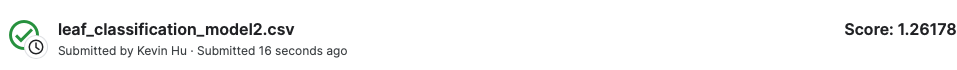

## Model 3
In Model 2 I tried to tune the kernel size however, my original cnn model base did not accept that option for tuning. I will try changing kernel size and keeping the optimal parameters from model 2.

In [47]:
def create_cnn_model(input_shape, num_classes, filters, dense_units, dropout_rate=0.5, kernel_size=(3, 3)):
    input_layer = Input(shape=input_shape)

    x = input_layer
    for f in filters:
        x = Conv2D(f, kernel_size, activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2))(x)
    
    x = Flatten()(x)
    x = Dense(dense_units, activation='relu')(x)
    if dropout_rate > 0:
        x = Dropout(dropout_rate)(x)
    
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [48]:
kernel_sizes = [(3, 3), (5, 5), (7, 7)]

best_params = {'filters': [32, 64, 128, 256], 'dense_units': 512, 'dropout_rate': 0.5}

results = []

for kernel_size in kernel_sizes:
    fold_results = []
    for fold, (train_index, val_index) in enumerate(stratified_kfold.split(aligned_images, y_encoded)):
        X_train_fold, X_val_fold = aligned_images[train_index], aligned_images[val_index]
        y_train_fold, y_val_fold = y_encoded[train_index], y_encoded[val_index]
        y_train_fold_categorical = to_categorical(y_train_fold, num_classes=99)
        y_val_fold_categorical = to_categorical(y_val_fold, num_classes=99)

        model = create_cnn_model(input_shape=(64, 64, 3), num_classes=99, kernel_size=kernel_size, **best_params)
        history = model.fit(X_train_fold, y_train_fold_categorical, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold_categorical))

        best_val_accuracy = max(history.history['val_accuracy'])
        best_val_loss = min(history.history['val_loss'])
        fold_results.append({'fold': fold, 'accuracy': best_val_accuracy, 'loss': best_val_loss})

    results.append({'kernel_size': kernel_size, 'results': fold_results})

for model_result in results:
    kernel_size = model_result['kernel_size']
    best_accuracy = max(result['accuracy'] for result in model_result['results'])
    best_loss = min(result['loss'] for result in model_result['results'])

    print(f"Kernel Size: {kernel_size}")
    print(f"Best Validation Accuracy: {best_accuracy}")
    print(f"Best Validation Loss: {best_loss}\n")


Epoch 1/10
21/21 [==============================] - 3s 129ms/step - loss: 4.6158 - accuracy: 0.0061 - val_loss: 4.5952 - val_accuracy: 0.0030
Epoch 2/10
21/21 [==============================] - 3s 120ms/step - loss: 4.5956 - accuracy: 0.0030 - val_loss: 4.5951 - val_accuracy: 0.0091
Epoch 3/10
21/21 [==============================] - 3s 123ms/step - loss: 4.5952 - accuracy: 0.0030 - val_loss: 4.5936 - val_accuracy: 0.0242
Epoch 4/10
21/21 [==============================] - 2s 119ms/step - loss: 4.5897 - accuracy: 0.0136 - val_loss: 4.5686 - val_accuracy: 0.0485
Epoch 5/10
21/21 [==============================] - 2s 119ms/step - loss: 4.5081 - accuracy: 0.0212 - val_loss: 4.2176 - val_accuracy: 0.1030
Epoch 6/10
21/21 [==============================] - 2s 119ms/step - loss: 4.0313 - accuracy: 0.0879 - val_loss: 3.4519 - val_accuracy: 0.2030
Epoch 7/10
21/21 [==============================] - 3s 121ms/step - loss: 3.4545 - accuracy: 0.1788 - val_loss: 2.9808 - val_accuracy: 0.2909
Epoch 

Epoch 9/10
21/21 [==============================] - 7s 333ms/step - loss: 2.1530 - accuracy: 0.4015 - val_loss: 2.0682 - val_accuracy: 0.4485
Epoch 10/10
21/21 [==============================] - 7s 337ms/step - loss: 1.7597 - accuracy: 0.5045 - val_loss: 1.7995 - val_accuracy: 0.5091
Epoch 1/10
21/21 [==============================] - 14s 625ms/step - loss: 4.6363 - accuracy: 0.0091 - val_loss: 4.5953 - val_accuracy: 0.0091
Epoch 2/10
21/21 [==============================] - 13s 618ms/step - loss: 4.5959 - accuracy: 0.0045 - val_loss: 4.5955 - val_accuracy: 0.0091
Epoch 3/10
21/21 [==============================] - 13s 624ms/step - loss: 4.5956 - accuracy: 0.0061 - val_loss: 4.5958 - val_accuracy: 0.0091
Epoch 4/10
21/21 [==============================] - 13s 620ms/step - loss: 4.5953 - accuracy: 0.0076 - val_loss: 4.5959 - val_accuracy: 0.0091
Epoch 5/10
21/21 [==============================] - 13s 621ms/step - loss: 4.5955 - accuracy: 0.0076 - val_loss: 4.5961 - val_accuracy: 0.0091


Due to their being no difference in optimal kernel size, there is no difference in the model 2 and model 3, since it will be made using the same parameters.